# Regression Trees

### **Regression Tree**

#### **Import Libarary**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn.model_selection as skm

from statsmodels.datasets import get_rdataset
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS

**libararies required for tree-based model**

In [2]:
# Decision_Trees
from sklearn.tree import (DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)

# Metrics
from sklearn.metrics import (mean_squared_error, 
                             r2_score)

#### **Import data** 

**"Boston" from libarary ISLP**

**This dataset includes 11 predictors and 1 target variable ("medv").**

In [3]:
Boston = load_data("Boston")
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


**We want to predict if the amount for "Medv".**

#### **Create a input model in order to predict "medv" using all 11 predictors.**

In [4]:
model=MS(Boston.columns.drop("medv"), intercept=False)
D=model.fit_transform(Boston)
feature_names = list(D.columns)
print("name of features:", feature_names)
D

name of features: ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat']


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48


#### **Convert all qualitative variables to binary variables**

In this data set we do not have any qualitative variables.

#### **Creating Input Data: X**

**In order to fit a decision tree classifier using "Sklearn", X should be an array**

In [5]:
X=np.asarray(D)
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 2.9600e+02, 1.5300e+01,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 2.4200e+02, 1.7800e+01,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 2.4200e+02, 1.7800e+01,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.7300e+02, 2.1000e+01,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.7300e+02, 2.1000e+01,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.7300e+02, 2.1000e+01,
        7.8800e+00]])

#### **Spliting data into training set and test set**

**Here we consider 30% of data for test set and remaining in training set**

In [6]:
(X_train, X_test, y_train, y_test)=skm.train_test_split(X,Boston['medv'], test_size=0.3, random_state=0)

#### **Define and fit a Decision Tree Regression on Data**

In [7]:
Reg_Tree_1=DTR( max_depth=3)

#Fit the classifier on data
Reg_Tree_1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

#### **Report results and Plot the Tree**

[Text(0.5, 0.875, 'rm <= 6.797\nsquared_error = 84.765\nsamples = 354\nvalue = 22.745'),
 Text(0.25, 0.625, 'lstat <= 14.405\nsquared_error = 35.011\nsamples = 284\nvalue = 19.614'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'dis <= 1.474\nsquared_error = 20.776\nsamples = 167\nvalue = 22.981'),
 Text(0.0625, 0.125, 'squared_error = 0.0\nsamples = 2\nvalue = 50.0'),
 Text(0.1875, 0.125, 'squared_error = 12.072\nsamples = 165\nvalue = 22.653'),
 Text(0.375, 0.375, 'crim <= 5.782\nsquared_error = 16.049\nsamples = 117\nvalue = 14.808'),
 Text(0.3125, 0.125, 'squared_error = 10.345\nsamples = 67\nvalue = 16.872'),
 Text(0.4375, 0.125, 'squared_error = 10.334\nsamples = 50\nvalue = 12.042'),
 Text(0.75, 0.625, 'rm <= 7.435\nsquared_error = 85.388\nsamples = 70\nvalue = 35.451'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'crim <= 7.393\nsquared_error = 44.147\nsamples = 47\nvalue = 30.921'),
 Text(0.5625, 0.125, 'squared_error = 19.597\nsamples = 43\nvalue = 32.465'),
 Text

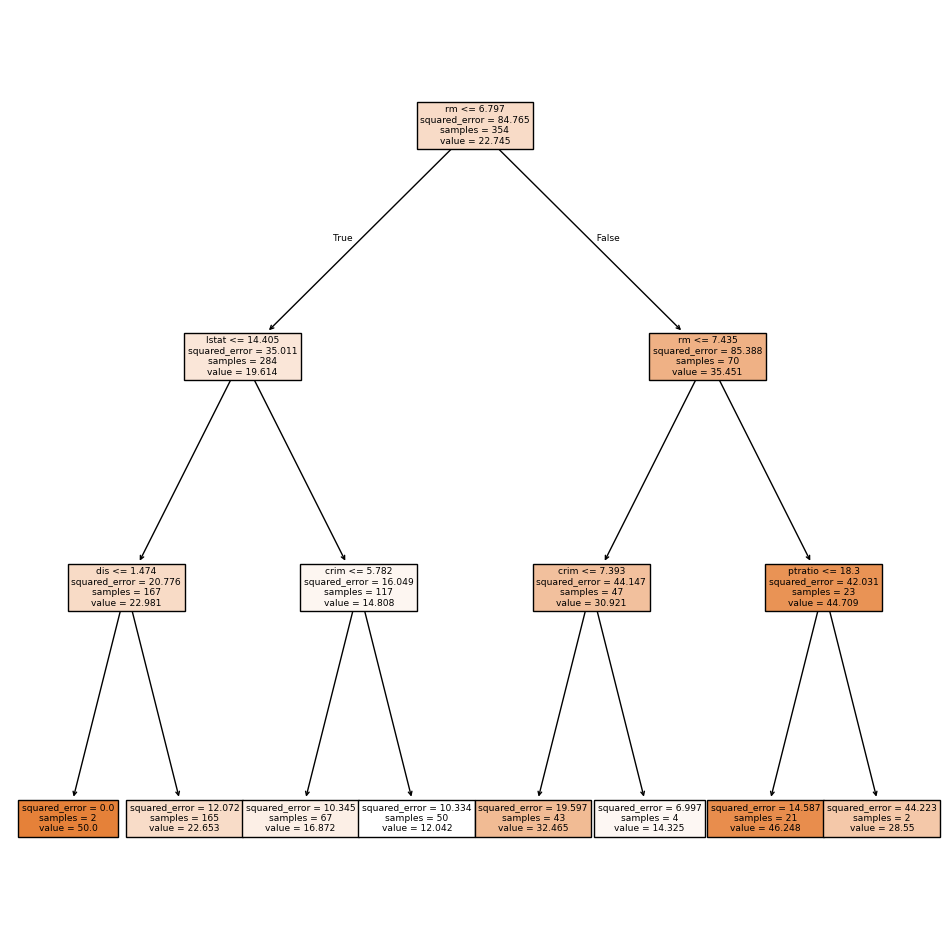

In [8]:
plt.figure(figsize=(12,12))
plot_tree(Reg_Tree_1 , filled=True, feature_names=feature_names )

In [9]:
print(export_text(Reg_Tree_1, feature_names=feature_names, show_weights=True))

|--- rm <= 6.80
|   |--- lstat <= 14.40
|   |   |--- dis <= 1.47
|   |   |   |--- value: [50.00]
|   |   |--- dis >  1.47
|   |   |   |--- value: [22.65]
|   |--- lstat >  14.40
|   |   |--- crim <= 5.78
|   |   |   |--- value: [16.87]
|   |   |--- crim >  5.78
|   |   |   |--- value: [12.04]
|--- rm >  6.80
|   |--- rm <= 7.43
|   |   |--- crim <= 7.39
|   |   |   |--- value: [32.47]
|   |   |--- crim >  7.39
|   |   |   |--- value: [14.32]
|   |--- rm >  7.43
|   |   |--- ptratio <= 18.30
|   |   |   |--- value: [46.25]
|   |   |--- ptratio >  18.30
|   |   |   |--- value: [28.55]



#### **Training Meseasurement Metrics**

1. **Mean Squared Error** 

2. **${R}^{2}$ _Score**



In [10]:
MeanSquaredError=mean_squared_error(y_train , Reg_Tree_1.predict(X_train))
R_Squared=r2_score(y_train, Reg_Tree_1.predict(X_train) )

print("Model DTR:\nMean Squared Error:", round(MeanSquaredError,2), "\nR_Squared:", round(R_Squared, 2))


Model DTR:
Mean Squared Error: 12.62 
R_Squared: 0.85


#### **Performance Metrics_ Validation**

##### 1. **Performance (test) Meseasurement Metrics**

In [11]:
MeanSquaredError=mean_squared_error(y_test , Reg_Tree_1.predict(X_test))

MSE=np.mean((y_test-Reg_Tree_1.predict(X_test))**2)

R_Squared=r2_score(y_test, Reg_Tree_1.predict(X_test) )

print("Model DTR:\nMean Squared Error (test):", round(MSE,2), "\nR_Squared(test):", round(R_Squared, 2))


Model DTR:
Mean Squared Error (test): 28.07 
R_Squared(test): 0.66


##### 2. **Cross Validation**

**skm.ShuffleSplit**:This is a cross-validation technique that randomly shuffles and splits the data into training and testing sets. It can be used for tasks like validation and model evaluation.

**n_splits**:  This specifies the number of re-shuffling & splitting iterations to be performed. Here, n_splits=1 means that the data will be split into training and test sets only once.

In [12]:
validation= skm.ShuffleSplit(n_splits=1,
                             test_size=200,
                             random_state=0)

results=skm.cross_validate(Reg_Tree_1, D, Boston['medv'], cv=validation)

test_score= results['test_score']

print('Model DTC\ntest score:', round(test_score.item(),2))

Model DTC
test score: 0.75


### **Prunning_Regression Tree**

##### 1. **Create a whole tree on the training set**


We need to train the entire tree on the training data, which we've already done, and it's named Reg_Tree_1.

##### 2. **Extract cost-complexity values**

- **Cost-Complexity Pruning**: This is a method for pruning decision trees. It works by adding a penalty for tree complexity to the error of the tree. The goal is to find the optimal balance between the complexity of the tree and its accuracy on the training data.

- **cost_complexity_pruning_path() Method**:The cost_complexity_pruning_path() method of a decision tree classifier is used to compute the cost-complexity pruning path for the decision tree. This path contains a sequence of possible prunings, along with the corresponding effective alpha values (which control the pruning strength).

- **Returns**: The method returns a dictionary that includes:
        a. ccp_alphas: Array of effective alpha values, where each value corresponds to a subtree in the pruning sequence.
        b. impurities: The total impurity (a measure of misclassification) of the leaves in the tree at each alpha value.

In [13]:
ccp_path = Reg_Tree_1.cost_complexity_pruning_path(X_train , y_train)
ccp_path

{'ccp_alphas': array([ 0.        ,  1.6156522 ,  1.88662474,  3.40178969,  4.17448592,
         8.29259286, 12.98252736, 39.79182618]),
 'impurities': array([12.61901452, 14.23466673, 16.12129147, 19.52308115, 23.69756707,
        31.99015993, 44.97268729, 84.76451347])}

##### 3. **Cross-Validation Training Error to find alpha values**

**3.1. define K-fold cross validation:**

shuffle=True: Before splitting the data into folds, the data is shuffled randomly. This ensures that each fold is representative of the entire dataset.

In [14]:
kfold = skm.KFold(5, random_state=10, shuffle=True)

**3.2. Grid Search by "skm.GridSearchCV":**
- Purpose: Grid Search is a technique for finding the best hyperparameters for a model. It works by exhaustively searching through a specified grid of hyperparameters and evaluating the model's performance for each combination using cross-validation.

- refit=True: Once GridSearchCV finds the best hyperparameter (in this case, the best ccp_alpha), it will automatically refit the model on the entire training dataset using this best parameter.

- scoring= 'accuracy': This specifies the metric used to evaluate the model's performance. Here, it's set to 'accuracy', meaning that GridSearchCV will choose the ccp_alpha that maximizes the accuracy of the model.

In [15]:
grid = skm.GridSearchCV(Reg_Tree_1,
{'ccp_alpha': ccp_path.ccp_alphas},
refit=True ,    
cv=kfold ,
scoring='neg_mean_squared_error')


**3.3. fit the data to Grid:** it fits the model using the best hyperparameters found through grid search.

In [16]:
grid.fit(X_train , y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=DecisionTreeRegressor(max_depth=3),
             param_grid={'ccp_alpha': array([ 0.        ,  1.6156522 ,  1.88662474,  3.40178969,  4.17448592,
        8.29259286, 12.98252736, 39.79182618])},
             scoring='neg_mean_squared_error')


**3.4. Evaluate the Best Model:**
grid.best_score_ gives you the highest accuracy achieved by the model during the grid search. This tells you how well the best pruned tree performs in cross-validation.

In [17]:
best_ = grid.best_estimator_
MSE=np.mean((y_test-best_.predict(X_test))**2)
print('Model: DTR_Prunned\nMean Squared Error (MSE):', round(MSE,2))

Model: DTR_Prunned
Mean Squared Error (MSE): 28.07


##### 4. **plot the prunned tree**

Number of level (terminal nodes) of prunned tree 8
Cross-Validation Accuracy on Training data: 28.07


[Text(0.5, 0.875, 'rm <= 6.797\nsquared_error = 84.765\nsamples = 354\nvalue = 22.745'),
 Text(0.25, 0.625, 'lstat <= 14.405\nsquared_error = 35.011\nsamples = 284\nvalue = 19.614'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'dis <= 1.474\nsquared_error = 20.776\nsamples = 167\nvalue = 22.981'),
 Text(0.0625, 0.125, 'squared_error = 0.0\nsamples = 2\nvalue = 50.0'),
 Text(0.1875, 0.125, 'squared_error = 12.072\nsamples = 165\nvalue = 22.653'),
 Text(0.375, 0.375, 'crim <= 5.782\nsquared_error = 16.049\nsamples = 117\nvalue = 14.808'),
 Text(0.3125, 0.125, 'squared_error = 10.345\nsamples = 67\nvalue = 16.872'),
 Text(0.4375, 0.125, 'squared_error = 10.334\nsamples = 50\nvalue = 12.042'),
 Text(0.75, 0.625, 'rm <= 7.435\nsquared_error = 85.388\nsamples = 70\nvalue = 35.451'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'crim <= 7.393\nsquared_error = 44.147\nsamples = 47\nvalue = 30.921'),
 Text(0.5625, 0.125, 'squared_error = 19.597\nsamples = 43\nvalue = 32.465'),
 Text

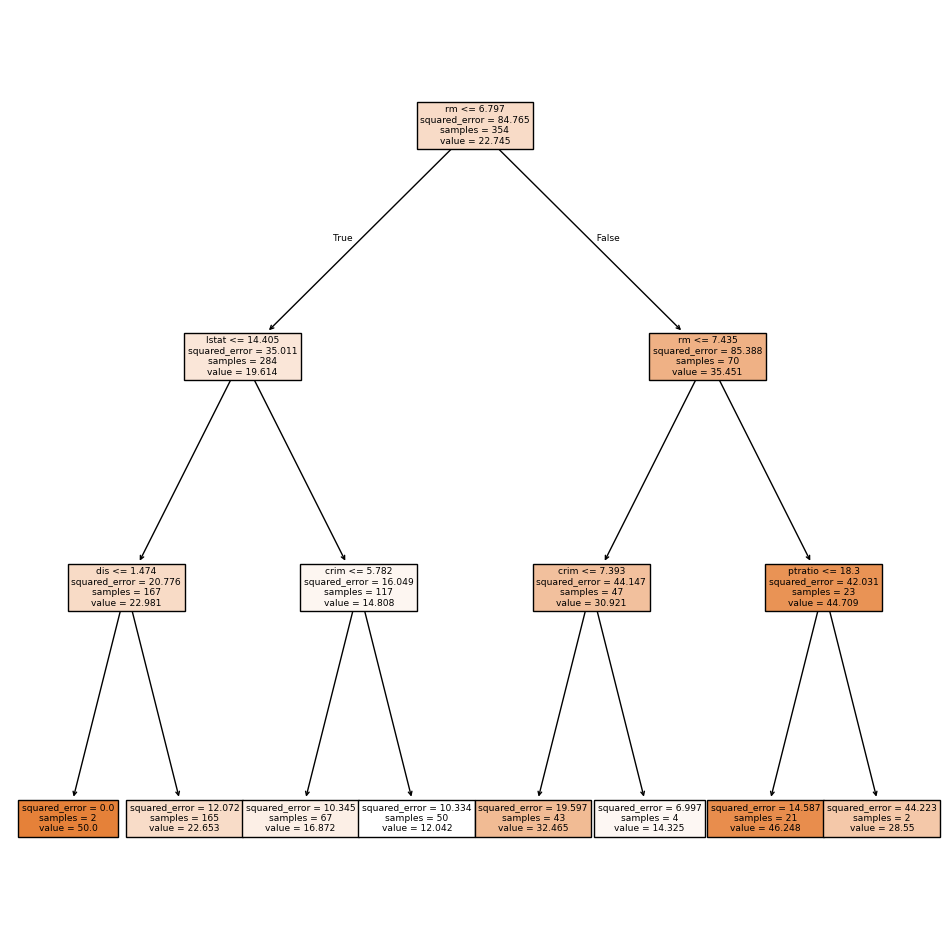

In [18]:
plt.figure(figsize=(12,12))

print('Number of level (terminal nodes) of prunned tree',  best_.tree_.n_leaves)
print('Cross-Validation Accuracy on Training data:',  round(MSE, 2))
plot_tree(best_ , feature_names=feature_names, filled=True)